# Project: Investigate a Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this dataset investigation project, we'll be using data from The Movie Database (TMDb). The data comes witht the following fields: 

    id	
    imdb_id
    popularity
    budget
    revenue
    original_title
    cast
    homepage
    director
    tagline
    keywords
    overview
    runtime
    genres
    production_companies
    release_date
    vote_count
    vote_average
    release_year
    budget_adj
    revenue_adj


Given this data, we can look into the following questions: 

> **How has average budget changed over the years?**
>
> **Are runtime or budget correlated with revenue?**
>
> **What is the distribution of movie runtime?**



<a id='wrangling'></a>
## Data Wrangling

First, lets set up our environment and download the date. 

Once we've done that, we can check for inconsistencies then trim and clean the dataset for analysis. 

### Downloading the Data

The first step of the process is importing the Python packages we'll be using: 

In [235]:
# import python data analysis libraries
import pandas as pd
import matplotlib.pyplot as plt

# line magic command to display matplotlib charts inline
%matplotlib inline

In [236]:
# Load database
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Based on the dataframe head above, it looks like the database was successfully downloaded!

### Cleaning the Data

Let's start cleaning the data by checking for missing data, duplicates, or incorrect data types. 

#### Missing Data

In [237]:
# Check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

I see that there are a total of 10,866 rows. But it looks like *cast, homepage, director, tagline, keywords, overview, genres,* and *production_companies* have some missing data. 

Let's avoid dropping data and replace the NULL values with a marker string: 

In [238]:
# replace NULL values with "--"
df.fillna("--", inplace=True)
    
# Check for null values
df.isnull().sum().any()

False

#### Duplicate Data

In [239]:
# Is there duplicate data? 
def checkDupes():
    return df.duplicated().any()

checkDupes()

True

In [240]:
# Since we have duplicated data, let's drop duplicates
df.drop_duplicates(inplace=True)

# Check that duplicates were dropped
checkDupes()

False

#### Incorrect Data Types

In [241]:
# View the data type of each field
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Since we're not merging data tables, we can go along with the default datatypes.

<a id='eda'></a>
## Exploratory Data Analysis


### How has average budget changed over the years? 

Let's make a blueprint for answering this question. 

1. Find the average movie budget for each year
2. Plot a line chart to visualize how the budget trend changes

Before we get started, let's make sure there aren't issues with the data that we missed earlier. We'll make a function for cleaning our data that will check for zero values and smooth our data. 

In [242]:
# check if there are missing budgets
def findZeros(field, value):
    df_zeros = df.query('{} == {}'.format(field, value))
    return df_zeros

findZeros('budget_adj', 0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,--,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,--,Jean-Baptiste LÃ©onetti,--,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,--,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,--,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,--,Chris Buck|Jennifer Lee,--,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,--,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


There are budget values with $0. It's not likely there are many movies made for free, so let's remove these errors from our data. 

In [243]:
# let's drop the rows that have $0 budget
def dropZeros(field, value):
    drop_rows= findZeros(field, value).index
    df.drop(drop_rows, axis=0, inplace=True)

dropZeros('budget_adj', 0)
# let's confirm all $0 budgets were dropped
findZeros('budget_adj',0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


We've removed rows that didn't include a budget, but let's quickly check if there are any outliers we need to remove.

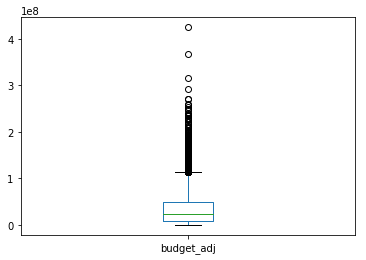

In [244]:
# plot a box plot to check for budget outliers. 
df['budget_adj'].plot(kind='box');

In [245]:
df['budget_adj'].describe()

count    5.169000e+03
mean     3.688907e+07
std      4.196096e+07
min      9.210911e-01
25%      8.102293e+06
50%      2.271505e+07
75%      5.008384e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

For the sake of the time series and scatter plot we'll be making, let's trim the data to remove any potential outliers. Anything beyond the 75th percentile we can drop.

In [246]:
# let's define a new function to pick up the rows that contain outliers
def findOutliers(field, quantile):
    
    # find the 75th percentile. It should match the df['budget_adj'].describe() above
    upper_lim = df[field].quantile(0.75)
    
    return df.query('{} > {}'.format(field, upper_lim))

In [247]:
# let's confirm we have rows over the 75th percentile
findOutliers('budget_adj', 0.75)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [248]:
# Drop anything above our upper limit
def dropOutliers(field, quantile):
    outlier_rows = findOutliers(field, quantile).index
    df.drop(outlier_rows, axis=0, inplace=True)
    
    # Check that it's been dropped
    return df[field].describe()

dropOutliers('budget_adj', 0.75)

count    3.879000e+03
mean     1.747457e+07
std      1.379633e+07
min      9.210911e-01
25%      5.408346e+06
50%      1.440984e+07
75%      2.763273e+07
max      5.008384e+07
Name: budget_adj, dtype: float64

You can see that the max budget value is what used to be the 75th percentile. We have successfully trimmed our budget data to get a closer look. 

In [249]:
# 1. find the average movie budget for each year
df_mean_budget = df.groupby('release_year').budget_adj.mean()
df_mean_budget.head()

release_year
1960    9.268694e+06
1961    2.588946e+07
1962    9.647608e+06
1963    1.407704e+07
1964    1.580626e+07
Name: budget_adj, dtype: float64

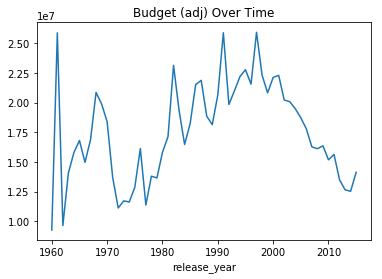

In [250]:
# 2. Plot a line chart
df_mean_budget.plot(kind="line", title="Budget (adj) Over Time");

### Are runtime or budget correlated with revenue? 

Correlation can be visualized with a scatter plot. Let's take a look at a scatter plot of the following: 

1. Runtime vs. Revenue (adj)
2. Budget (adj) vs. Revenue (adj)
3. Runtime vs. Budget (adj) (this will see if there is multicollinearity, meaning whether the two x-variables are related.)

Before we get started, let's make sure the data is clean. We already checked budget, so now let's drop zeros and outliers for runtime and revenue. 

In [251]:
# using the functions from when we dropped zeros and outliers for budget, above
dropZeros('revenue_adj',0)
dropOutliers('revenue_adj',0.75)

count    1.990000e+03
mean     2.754904e+07
std      2.464484e+07
min      2.370705e+00
25%      5.692948e+06
50%      2.112218e+07
75%      4.389096e+07
max      8.674770e+07
Name: revenue_adj, dtype: float64

In [252]:
# let's repeat the process for runtime
dropZeros('runtime', 0)
dropOutliers('runtime', 0.75)

count    1503.000000
mean       97.139055
std         8.920493
min        15.000000
25%        91.000000
50%        97.000000
75%       104.000000
max       112.000000
Name: runtime, dtype: float64

If a movie is less than an hour, we might consider it a short film that wouldn't belong in our movie database. Let's remove movies with runtimes less than an hour. 

In [253]:
# Find if a movie is actually a short file (less than 60 minute runtime)
def findShortFilms(field, value):
    df_zeros = df.query('{} < {}'.format(field, value))
    return df_zeros

# let's drop the rows that are short films
def dropShortFilms(field, value):
    drop_rows= findShortFilms(field, value).index
    df.drop(drop_rows, axis=0, inplace=True)
    
dropShortFilms('runtime', 60)

# view the quick summary table to see the minimum runtime is at least 60 minutes
df.runtime.describe()

count    1500.000000
mean       97.278000
std         8.355233
min        62.000000
25%        91.000000
50%        97.000000
75%       104.000000
max       112.000000
Name: runtime, dtype: float64

Pandas has a helpful function called `corr()` that lets us see how variables are correlated. In order to use it easily, let's create a dataframe of just the variables we're interested in. 

In [254]:
df_corr = df.loc[:, ['runtime', 'budget_adj', 'revenue_adj']]
df_corr.head()

,runtime,budget_adj,revenue_adj
12,108,1.379999e+07,3.391985e+07
39,111,1.012000e+07,5.711002e+07
44,112,2.299999e+07,3.921938e+07
45,97,9.199996e+06,1.318708e+07
47,109,1.104000e+07,7.867128e+07


Now we have a table of the three variables we'll be looking at, so we're all set. 

We can see the correlation coefficient for each pair-combination of the variables with the function `df.corr()`: 

In [255]:
df_corr.corr()

,runtime,budget_adj,revenue_adj
runtime,1.000000,0.159667,0.056953
budget_adj,0.159667,1.000000,0.395267
revenue_adj,0.056953,0.395267,1.000000


There doesn't seem to be any strong correlation (correlation coefficient >= 7). But we can plot scatter plots to confirm. 

#### Runtime vs. Revenue (adj)

In [256]:
# Lets create a function to avoid repetitively making the scatter plots

def scatterPlot(xvar, yvar):
    df_corr.plot(x=xvar, y=yvar, kind='scatter', title=xvar+" vs. " +yvar)

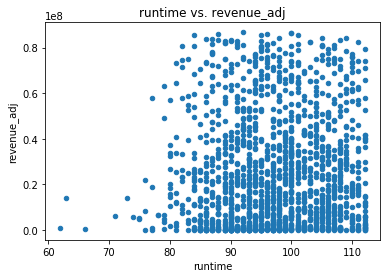

In [257]:
scatterPlot('runtime', 'revenue_adj')

#### Budget (adj) vs. Revenue (adj)

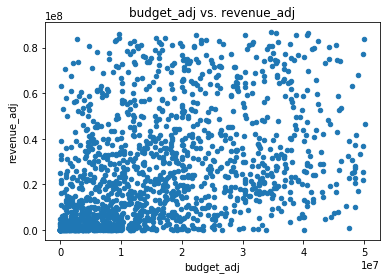

In [258]:
scatterPlot('budget_adj', 'revenue_adj')

#### Runtime vs. Budget (adj)

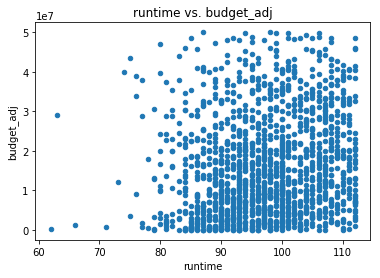

In [259]:
scatterPlot('runtime', 'budget_adj')

The only thing we can really take away from these charts is that all three of these variables are slightly positively correlated. 

### What is the distribution of movie runtime? 

To answer this question, a histogram would be helpful for visualizing the frequency of different movie runtimes.

Before we create a histogram, let's look at a summary of the data, where we can check for outliers or incorrect values.

In [260]:
# we can get the summary information for run time
df['runtime'].describe()

count    1500.000000
mean       97.278000
std         8.355233
min        62.000000
25%        91.000000
50%        97.000000
75%       104.000000
max       112.000000
Name: runtime, dtype: float64

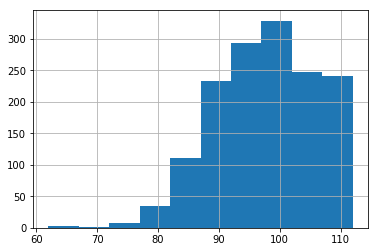

In [261]:
# plot a histogram of movie runtimes
df['runtime'].hist();

The mean runtime for movies is 97.28 minutes, and the distribution is roughly normal.

<a id='conclusions'></a>
## Conclusions

We just completed an introductory data investigation on The Movie Database. Using Python's *Pandas* and *Matplotlib*, we looked into the average budget trend over time and whether runtime or budget are correlated with revenue. 

From our lineplot on Budget (adj) Over Time, it appears that there has been a positive trend in movie budget over time with a large spike around the year 2000. 

From our correlation table and scatter plots for revenue, budget, and runtime, we see there is only minimally positive linear correlation between the three variables. However, this also indicates that there may be multicollinearity among the predictors for revenue. This would require further investigation. 

Finally, we took a look at the distribution of movie runtimes, which we saw was roughly normal.

### Caveats:
This analysis was an elementary investigation of the movie dataset and comes with limitations. For example, while we took care to clean the data prior to analysis, we were not able to closely investigate the value in every cell. So, while we removed the obvious data flaws, there might still be minor ones as well as outliers that would skew our results. 

Additionally, the tools and processes we used for this analysis were the most basic functions of complex Python libraries. In order to capture trustworthy results and conduct investigations in closer detail, in the future, it would be beneficial to use the advantages the these libraries' more complicated functions provide.  

Finally, in order to narrow the scope used to investigate budget, revenue, and runtime, we trimmed off the top 25th percentile of data. The benefit of this was that it removed any questionable outliers. However, it also decreased our sample size and weakened the statistical tests. 

In [262]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0